In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale
from sklearn import preprocessing
import settings

In [41]:
png_name = 'icd'

In [42]:
regression_targets = f'{settings.raw_data_folder}control/regression_targets.csv'
data = f'{settings.processed_data_folder}{png_name}_selected_features.csv'

In [43]:
df = pd.read_csv(data, index_col=0)

In [44]:
targets = pd.read_csv(regression_targets)

In [45]:
merged = pd.merge(df, targets, on='Country')

In [46]:
merged

,Neoplasms,Mental and behavioural disorders,External causes of morbidity and mortality,Diseases of the musculoskeletal system and connective tissue,Country,Deaths,Confirmed,Recovered
0,40949.883333,567.650000,8502.416667,298.600000,Egypt,0.009527,0.167759,0.131002
1,1515.150000,87.333333,208.433333,49.833333,Mauritius,0.000791,0.046166,0.042688
2,6450.666667,207.833333,974.500000,140.500000,Morocco,0.023312,1.321111,1.262575
3,50640.500000,1926.500000,5989.000000,1612.666667,South Africa,0.077447,2.471490,2.248100
4,3559.000000,104.000000,298.000000,50.000000,Tunisia,0.060205,1.817216,1.453304
...,...,...,...,...,...,...,...,...
85,170927.750000,49328.666667,1998.583333,4546.166667,United Kingdom,0.167220,5.868483,0.015161
86,13160.750000,36.750000,2744.416667,201.916667,Uzbekistan,0.001817,0.231302,0.226751
87,46826.166667,9570.650000,1597.800000,1403.233333,Australia,0.003530,0.112025,0.101289
88,9790.000000,1671.750000,444.833333,280.166667,New Zealand,0.000501,0.046521,0.044696


In [47]:
def scale_df(df):
    x = df.values  # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df_scaled = pd.DataFrame(x_scaled)
    return df_scaled

In [48]:
columns_for_scale = merged.columns
columns_for_scale = columns_for_scale.tolist()
columns_for_scale.remove('Country')

In [49]:
countries = merged['Country']

In [50]:
scaled = scale_df(merged[columns_for_scale])

In [51]:
scaled.columns = columns_for_scale

In [52]:
features_for_som = columns_for_scale

In [53]:
features_for_som.remove('Deaths')

In [54]:
scaled['Country'] = countries

In [55]:
scaled['binned'] = pd.cut(scaled['Deaths'], 3, labels = ['small', 'medium', 'large'])

In [56]:
df_features_scaled_not_nan = scaled[scaled['binned'].notna()]

In [57]:
all_countries = df_features_scaled_not_nan['Country']

In [58]:
category_color = {'small': 'darkgreen',
                  'medium': '#ffa500',
                  'large': 'red'
                  }

In [59]:
colors_dict = {}
for c, dm in zip(all_countries, df_features_scaled_not_nan['binned']):
    colors_dict[c] = category_color[dm]

In [60]:

country_codes = {'Afghanistan': 'AF',
 'Albania': 'AL',
 'Algeria': 'DZ',
 'Angola': 'AO',
 'Argentina': 'AR',
 'Armenia': 'AM',
 'Australia': 'AU',
 'Austria': 'AT',
 'Azerbaijan': 'AZ',
 'Bahrain': 'BH',
 'Bangladesh': 'BD',
 'Belarus': 'BY',
 'Belgium': 'BE',
 'Benin': 'BJ',
 'Bhutan': 'BT',
 'Bolivia': 'BO',
 'Bosnia and Herzegovina': 'BA',
 'Botswana': 'BW',
 'Brazil': 'BR',
 'Bulgaria': 'BG',
 'Burkina Faso': 'BF',
 'Burundi': 'BI',
 'Cambodia': 'KH',
 'Cameroon': 'CM',
 'Canada': 'CA',
 'Cape Verde': 'CV',
 'Central African Republic': 'CF',
 'Chad': 'TD',
 'Chile': 'CL',
 'China': 'CN',
 'Colombia': 'CO',
 'Comoros': 'KM',
 'Costa Rica': 'CR',
 'Croatia': 'HR',
 'Cuba': 'CU',
 'Cyprus': 'CY',
 'Czechia': 'CZ',
 'Democratic Republic of the Congo': 'CD',
 'Denmark': 'DK',
 'Djibouti': 'DJ',
 'Dominican Republic': 'DO',
 'Ecuador': 'EC',
 'Egypt': 'EG',
 'El Salvador': 'SV',
 'Equatorial Guinea': 'GQ',
 'Eritrea': 'ER',
 'Estonia': 'EE',
 'Ethiopia': 'ET',
 'Fiji': 'FJ',
 'Finland': 'FI',
 'France': 'FR',
 'Gabon': 'GA',
 'Gambia': 'GM',
 'Georgia': 'GE',
 'Germany': 'DE',
 'Ghana': 'GH',
 'Greece': 'GR',
 'Guatemala': 'GT',
 'Guinea': 'GN',
 'Guinea-Bissau': 'GW',
 'Guyana': 'GY',
 'Haiti': 'HT',
 'Honduras': 'HN',
 'Hong Kong': 'HK',
 'Hungary': 'HU',
 'Iceland': 'IS',
 'India': 'IN',
 'Indonesia': 'ID',
 'Iran (Islamic Republic of)': 'IR',
 'Iraq': 'IQ',
 'Ireland': 'IE',
 'Israel': 'IL',
 'Italy': 'IT',
 'Ivory Coast': 'IC',
 'Jamaica': 'JM',
 'Japan': 'JP',
 'Jordan': 'JO',
 'Kazakhstan': 'KZ',
 'Kenya': 'KE',
 'Kuwait': 'KW',
 'Kyrgyzstan': 'KG',
 'Laos': 'LA',
 'Latvia': 'LV',
 'Lebanon': 'LB',
 'Lesotho': 'LS',
 'Liberia': 'LR',
 'Libya': 'LY',
 'Lithuania': 'LT',
 'Luxembourg': 'LU',
 'Macedonia': 'MK',
 'Madagascar': 'MG',
 'Malawi': 'MW',
 'Malaysia': 'MY',
 'Mali': 'ML',
 'Malta': 'MT',
 'Mauritania': 'MR',
 'Mauritius': 'MU',
 'Mexico': 'MX',
 'Republic of Moldova': 'MD',
 'Mongolia': 'MN',
 'Montenegro': 'ME',
 'Morocco': 'MA',
 'Mozambique': 'MZ',
 'Myanmar': 'MM',
 'Namibia': 'NA',
 'Nepal': 'NP',
 'Netherlands': 'NL',
 'New Zealand': 'NZ',
 'North Macedonia': 'NM',
 'Nicaragua': 'NI',
 'Niger': 'NE',
 'Nigeria': 'NG',
 'North Korea': 'KP',
 'Norway': 'NO',
 'Oman': 'OM',
 'Pakistan': 'PK',
 'Palestine': 'PS',
 'Panama': 'PA',
 'Papua New Guinea': 'PG',
 'Paraguay': 'PY',
 'Peru': 'PE',
 'Philippines': 'PH',
 'Poland': 'PL',
 'Portugal': 'PT',
 'Qatar': 'QA',
 'Republic of China (Taiwan)': 'TW',
 'Republic of the Congo': 'CG',
 'Romania': 'RO',
 'Russia': 'RU',
 'Rwanda': 'RW',
 'Saudi Arabia': 'SA',
 'Senegal': 'SN',
 'Serbia': 'RS',
 'Sierra Leone': 'SL',
 'Singapore': 'SG',
 'Slovakia': 'SK',
 'Slovenia': 'SI',
 'South Africa': 'ZA',
 'South Korea': 'KR',
 'Spain': 'ES',
 'Sri Lanka': 'LK',
 'Sudan': 'SD',
 'Suriname': 'SR',
 'Swaziland': 'SZ',
 'Sweden': 'SE',
 'Switzerland': 'CH',
 'Syria': 'SY',
 'Tajikistan': 'TJ',
 'Tanzania': 'TZ',
 'Thailand': 'TH',
 'Timor-Leste': 'TL',
 'Togo': 'TG',
 'Trinidad and Tobago': 'TT',
 'Tunisia': 'TN',
 'Turkey': 'TR',
 'Turkmenistan': 'TM',
 'Uganda': 'UG',
 'Ukraine': 'UA',
 'United Arab Emirates': 'AE',
 'United Kingdom': 'GB',
 'United States of America': 'US',
 'Uruguay': 'UY',
 'Uzbekistan': 'UZ',
 'Venezuela (Bolivarian Republic of)': 'VE',
 'Vietnam': 'VN',
 'Yemen': 'YE',
 'Zambia': 'ZM',
 'Zimbabwe': 'ZW',
'Bahamas': 'BHMS',
'Saint Vincent and the Grenadines': 'SVG',
'Barbados': 'BRBDS',
'Antigua and Barbuda' : 'AAB',
'Maldives' : 'MDV',
'Belize': 'BZE',
'Saint Lucia': 'SL',
'Grenada': 'GDA',
'Lao People\'s Democratic Republic':'LPDP',
'United Republic of Tanzania': 'TNZ',
'Russian Federation': 'Russia',
'Saint Kitts and Nevis' : 'SK',
'Uganda': 'UG',
                'Sao Tome and Principe': 'STP',
                'Solomon Islands': 'SI',
                'Cote d\'Ivoire': 'CI'}

In [61]:
feature_names = features_for_som

X = df_features_scaled_not_nan[feature_names].values

size = 8
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1.5,
              random_seed=1)

som.pca_weights_init(X)
som.train_random(X, 2500, verbose=True)

 [ 2500 / 2500 ] 100% - 0:00:00 left 
 quantization error: 0.0776851023064853


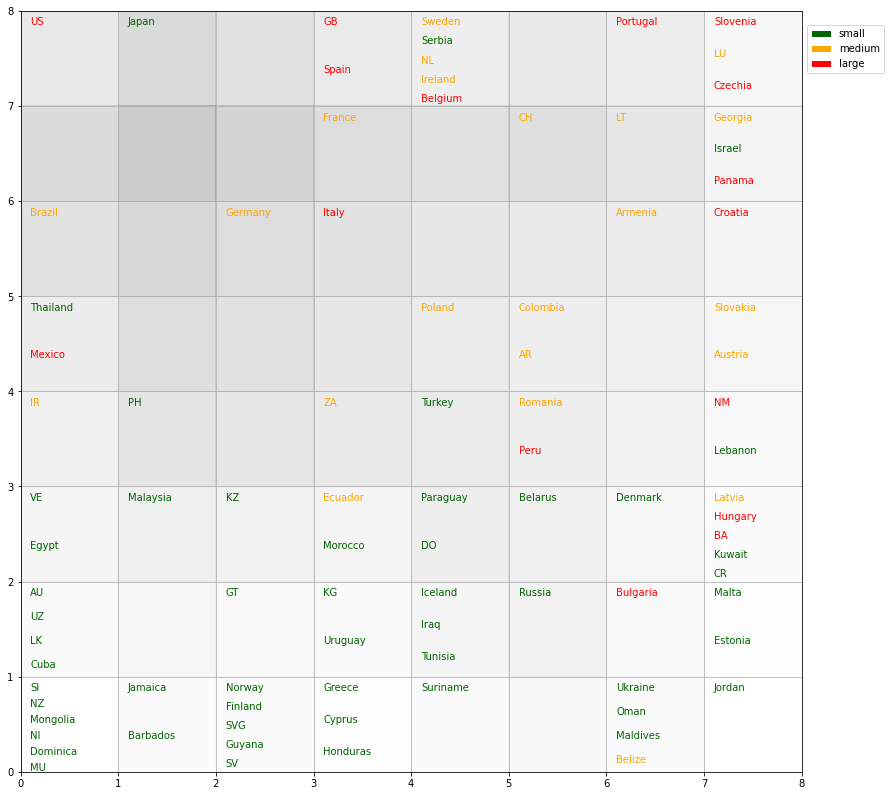

In [62]:
def shorten_country(c):
    if len(c) > 8 and c in country_codes:
        return country_codes[c]
    else:
        return c

country_map = som.labels_map(X, all_countries)
    
plt.figure(figsize=(14, 14))
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) + 0.15
        plt.text(x, y+off_set, shorten_country(c), color=colors_dict[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.savefig(f'./{png_name}_{size}x{size}.png', dpi=300, bbox_inches = "tight")
plt.show()

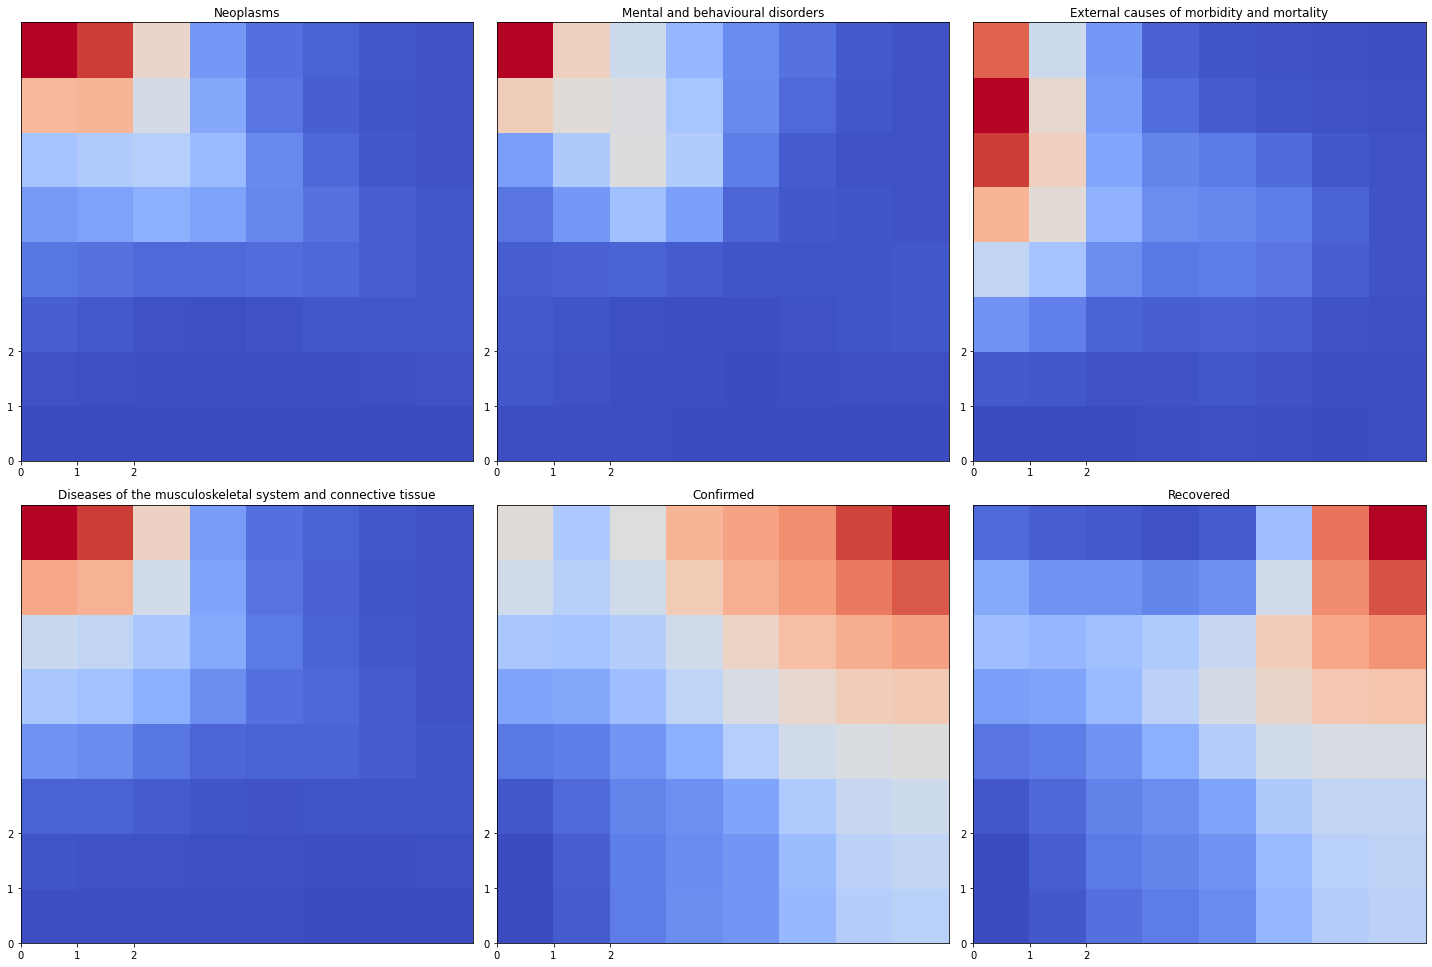

In [63]:
import math
W = som.get_weights()
size_plot = math.sqrt(len(feature_names))
size_plot = math.floor(size_plot)
plt.figure(figsize=(20, 20))
for i, f in enumerate(feature_names):
    plt.subplot(size_plot+1, size_plot+1, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size_plot+1))
    plt.yticks(np.arange(size_plot+1))
plt.tight_layout()
plt.savefig(f'./{png_name}_{size}x{size}_weights.png', dpi=300, bbox_inches = "tight")
plt.show()

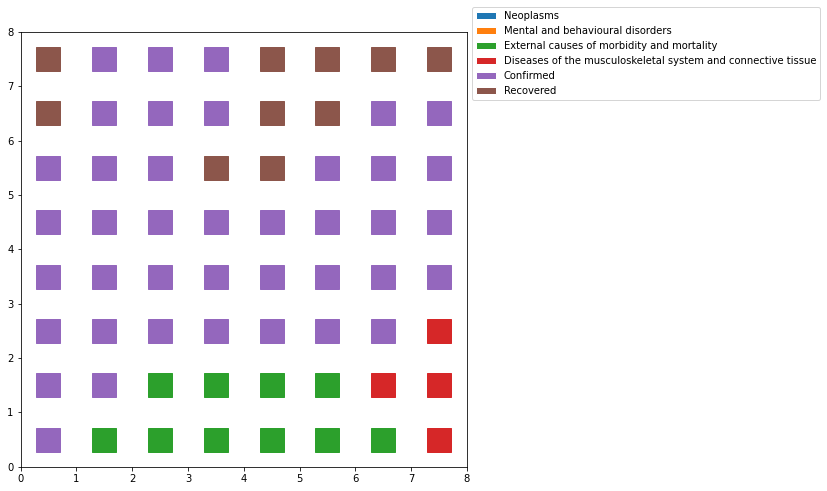

In [64]:
Z = np.zeros((size, size))
plt.figure(figsize=(8, 8))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(feature_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, size])
plt.ylim([0, size])
plt.savefig(f'./{png_name}_{size}x{size}_decisions.png', dpi=300, bbox_inches = "tight")
plt.show()